In [1]:

!pip install numpy
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
# Use pandas web datareader to pull financial information
import pandas_datareader as web
import pandas as pd
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.2 MB 60 kB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
# Import stock data from Yahoo Finance API
user_input = input('Please enter a stock ticker: ')
stock_data= web.DataReader(user_input,data_source="yahoo",start='2015-01-01',end='2021-09-30')
stock_data.head()

Please enter a stock ticker: TXN


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,54.080002,53.009998,53.560001,53.480000,4020100.0,43.324062
2015-01-05,53.490002,52.599998,53.189999,52.650002,5599300.0,42.651695
2015-01-06,53.020000,51.720001,52.889999,51.779999,5468400.0,41.946884
2015-01-07,52.869999,51.790001,52.009998,52.709999,4577100.0,42.700279
2015-01-08,53.950001,53.009998,53.130001,53.570000,6295200.0,43.396973


In [3]:
stock_data.shape

(1699, 6)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'Closing Price History')

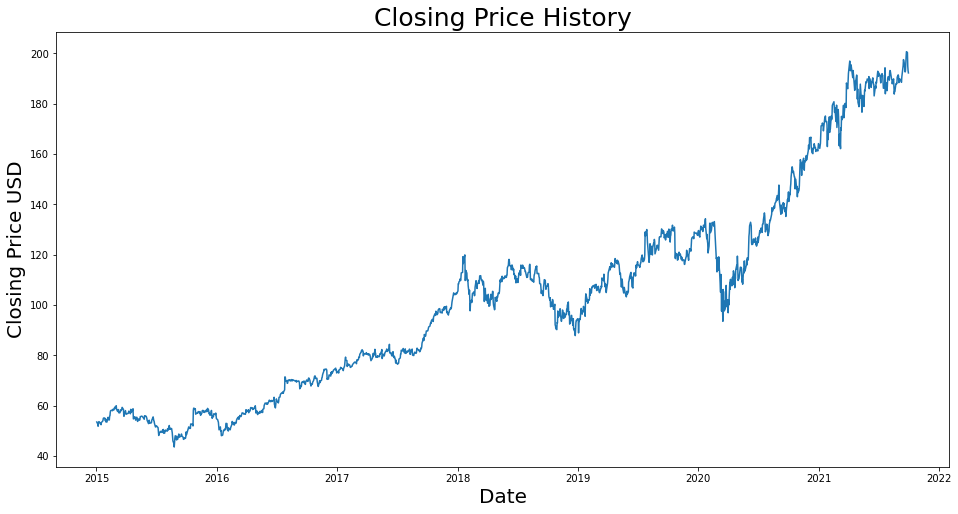

In [4]:
#Pull the closing price in stock's history
!pip install matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(16,8))
sns.lineplot(x= stock_data.index,y=stock_data['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Closing Price USD',fontsize=20)
plt.title('Closing Price History',fontsize=25)

In [5]:
# Split into train and test dataset
data_to_train = stock_data[:1530]
data_to_test = stock_data[1530:]

In [6]:
# Save a training dataset and testing dataset
data_to_train.to_csv('train_data.csv')
data_to_test.to_csv('test_data.csv')

In [7]:
user_data= stock_data.iloc[: , 3:4]
user_data.head()

,Close
Date,
2015-01-02,53.480000
2015-01-05,52.650002
2015-01-06,51.779999
2015-01-07,52.709999
2015-01-08,53.570000


In [8]:
# Create NumPy array
training_dataset= user_data.iloc[:1530,:].values

In [9]:
testing_dataset= user_data.iloc[1530:,:].values

In [10]:
# Normalizae the training dataset
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
scaled_training_dataset = sc.fit_transform(training_dataset)

In [11]:
# Create data structure with 60 timesteps and 1 output
X_train= [] # Independent variable
y_train= [] # Dependent ''  
# Append past 60 days data 
for i in range(60,1530):
    X_train.append(scaled_training_dataset[i-60:i,0]) # Append previous 60 days, not including 60 (i - 60)
    y_train.append(scaled_training_dataset[i,0])
    
X_train, y_train= np.array(X_train), np.array(y_train)

In [12]:
X_train.shape, y_train.shape

((1470, 60), (1470,))

In [13]:
# Reshape the LSMT model to be 3-D
X_train= np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1470, 60, 1)

In [14]:
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#  Initialize the RNN
model= Sequential()

# Add the first LSTM layer and some dropout regularisation
model.add(LSTM(units=100,return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(rate=0.4))

# Second ''
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(rate=0.4))

# Third ''
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(rate=0.4))

# Fourth '' 
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(rate=0.4))

# Fifth ''
model.add(LSTM(units=100))
model.add(Dropout(rate=0.4))

# Add the Output Layer
model.add(Dense(units=1))

# Compiling the Model (regression)
model.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 100)           8

In [16]:
# Fitting our model to the Training dataset
history=model.fit(X_train,y_train,epochs=35,batch_size=32)

Epoch 1/35
46/46 [==============================] - 31s 292ms/step - loss: 0.0215
Epoch 2/35
46/46 [==============================] - 13s 274ms/step - loss: 0.0045
Epoch 3/35
46/46 [==============================] - 13s 276ms/step - loss: 0.0043
Epoch 4/35
46/46 [==============================] - 13s 271ms/step - loss: 0.0042
Epoch 5/35
46/46 [==============================] - 13s 278ms/step - loss: 0.0035
Epoch 6/35
46/46 [==============================] - 14s 312ms/step - loss: 0.0042
Epoch 7/35
46/46 [==============================] - 13s 283ms/step - loss: 0.0038
Epoch 8/35
46/46 [==============================] - 13s 274ms/step - loss: 0.0037
Epoch 9/35
46/46 [==============================] - 12s 270ms/step - loss: 0.0040
Epoch 10/35
46/46 [==============================] - 12s 269ms/step - loss: 0.0031
Epoch 11/35
46/46 [==============================] - 12s 269ms/step - loss: 0.0034
Epoch 12/35
46/46 [==============================] - 13s 273ms/step - loss: 0.0034
Epoch 13/35
4

In [17]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [18]:
real_stock_price = test_data.iloc[:, 3:4].values

In [19]:
real_stock_price.shape

(169, 1)

In [20]:
testing_dataset.shape

(169, 1)

In [21]:
# Concatenate the dataset and scale
data_total= pd.concat([train_data['Close'], test_data['Close']],  axis=0)
inputs = data_total[len(data_total)-len(test_data)-60:].values 
inputs = inputs.reshape(-1,1) 
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 230):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
# 3D format
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

<ipython-input-21-751de9883752>:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = data_total[len(data_total)-len(test_data)-60:].values


In [22]:
inputs.shape

(229, 1)

In [23]:
data_total.shape

(1699,)

In [24]:
X_test.shape

(170, 60, 1)

In [25]:
# Make prediction from model
predicted_stock_price = model.predict(X_test)

6/6 [==============================] - 3s 79ms/step


In [26]:
# Inverse scaling
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

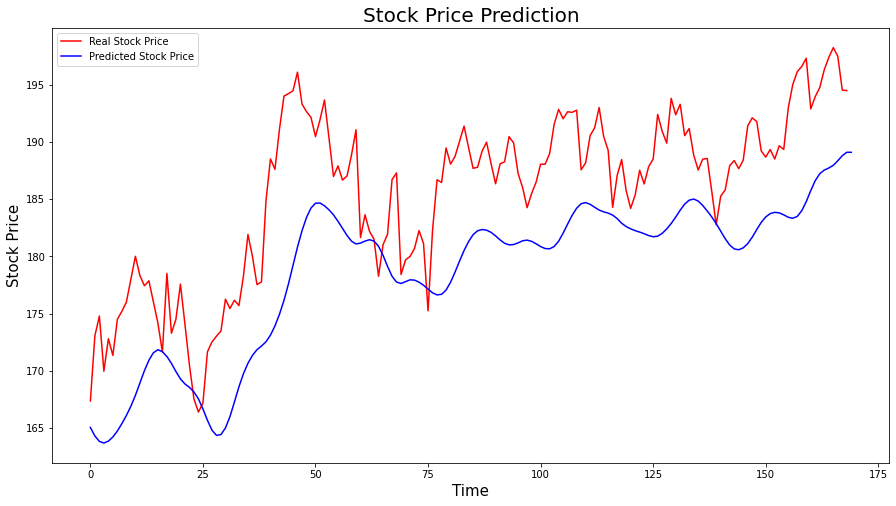

In [27]:
# Plot result
plt.figure(figsize=(15,8))
plt.plot(real_stock_price, color='Red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='Blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction',fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Stock Price',fontsize=15)
plt.legend()
plt.show()

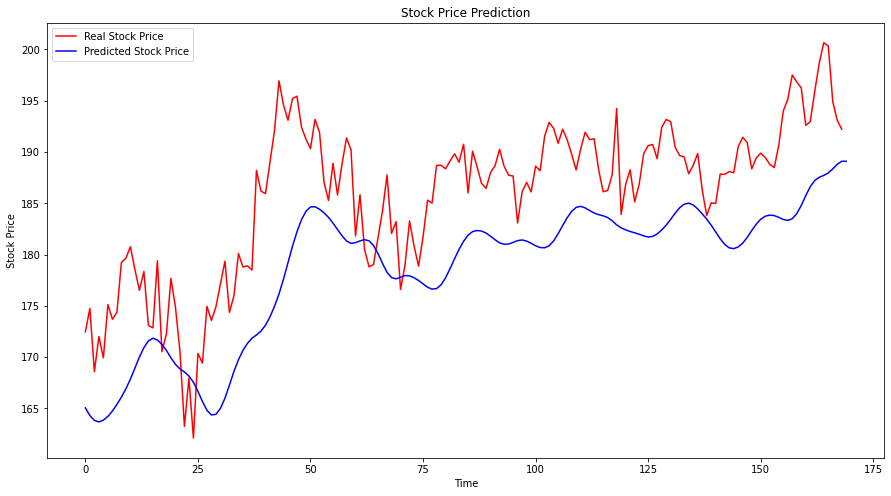

In [28]:
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(testing_dataset, color='Red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='Blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [29]:
print("Real Stock Price closing values (by day): ")
print(pd.DataFrame(real_stock_price))
print("Predicted Stock Price closing values (by day): ")
print(pd.DataFrame(predicted_stock_price))

Real Stock Price closing values (by day): 
              0
0    167.360001
1    173.050003
2    174.779999
3    169.960007
4    172.800003
..          ...
164  197.369995
165  198.229996
166  197.490005
167  194.529999
168  194.479996

[169 rows x 1 columns]
Predicted Stock Price closing values (by day): 
              0
0    165.048218
1    164.300766
2    163.827454
3    163.685623
4    163.853287
..          ...
165  187.948959
166  188.346680
167  188.794464
168  189.091400
169  189.088547

[170 rows x 1 columns]
